# Imports

In [5]:
from pathlib import Path
from scipy.signal import fftconvolve
from src.utils import get_audio, plot_audio_in_frequency, plot_audio_in_time, normalize_samples, get_fft_transform

# Playing with Spectrum

## Intro

In christmas eve I recorded a [vibration sound from a wine glass](https://youtu.be/80tmW5n5J-U).

I decided to try capturing the spectrum (FFT) from the audio.

## References

- [FFT with Scipy, RealPython](https://realpython.com/python-scipy-fft/)
- [FFT with Numpy](https://numpy.org/doc/stable/reference/routines.fft.html)
- [Visualization of FFT](https://canlab.github.io/_pages/tutorials/html/sin_cos_fft.html)
- [Chrome Music Lab - Spectrogram](https://musiclab.chromeexperiments.com/Spectrogram/).

# Defining Some Paths

In [6]:
__file__ = 'audio_experiments.ipynb'
this_file_path = Path(__file__).absolute()
samples_path = this_file_path.parents[1] / 'audio-files' / 'samples'
impulses_responses_path = this_file_path.parents[1] / 'audio-files' / 'impulse-responses'
my_voice_file_path = samples_path / 'mateus_e_samuel.wav'
long_hall_echo_path = impulses_responses_path / 'Large Long Echo Hall.wav'

## Loading an Audio File and Plot

In [7]:
cup_sound_path = samples_path / 'cup_sound.wav'
data, sample_rate, duration = get_audio(str(cup_sound_path))
plot_audio_in_time(data,sample_rate,duration)

NameError: name 'plot_audio_in_time' is not defined

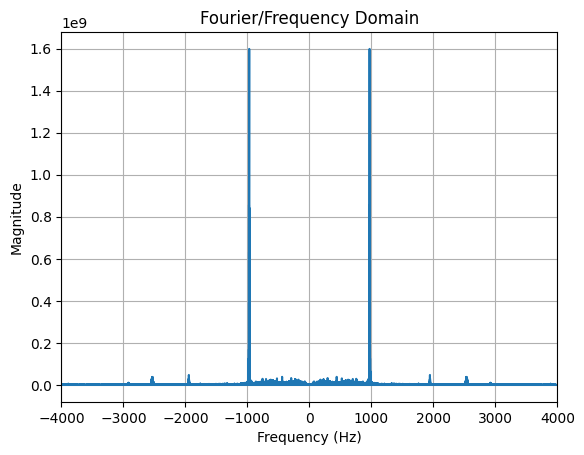

In [ ]:
normalized_audio = normalize_samples(data)
yf, xf = get_fft_transform(normalized_audio, sample_rate, duration)
plot_audio_in_frequency(xf, yf)

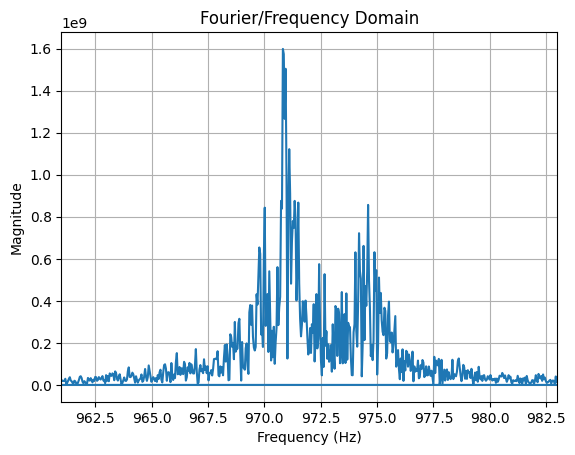

In [ ]:
plot_audio_in_frequency(xf, yf,[961,983])

# Processing Audio Example

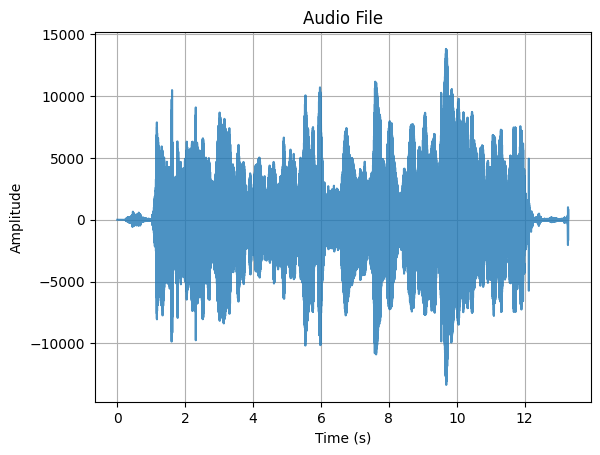

In [ ]:
apito_e_musica_path = samples_path / 'apito_e_musica.wav'
data, sample_rate, duration = get_audio(str(apito_e_musica_path))
plot_audio_in_time(data,sample_rate,duration)

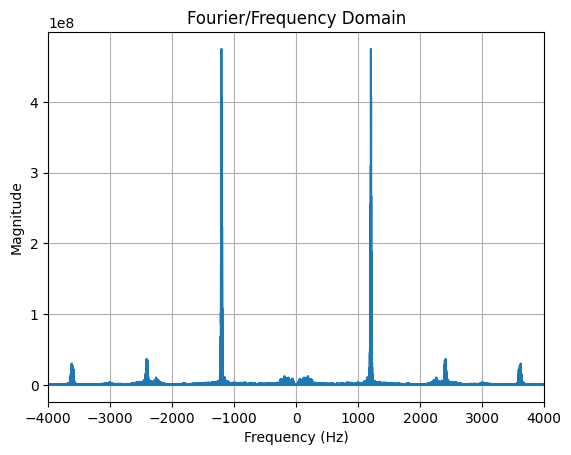

In [ ]:
normalized_audio = normalize_samples(data)
yf, xf = get_fft_transform(normalized_audio, sample_rate, duration)
plot_audio_in_frequency(xf, yf)

In [ ]:
plot_audio_in_frequency(xf, yf)

# Impulse Responses

It is January 12th. I started googling Butterworth filters and remembered my good ol' Impulse Response experiments (I wanted to show Jhonathan how this stuff works). Guess what? I just found a library of [free reverb impulses](https://www.voxengo.com/impulses/). Maybe I didn't find something the first time because I was searching the wrong way. I guess I googled something like `impulse response cathedral`...

Whatever

When opening the IR file using `scipy.io.wavfile.read` I found it is a matrix. I think each column is a channel, and the audio is meant to be stereo. So, I'll take just one of the cols and that is it

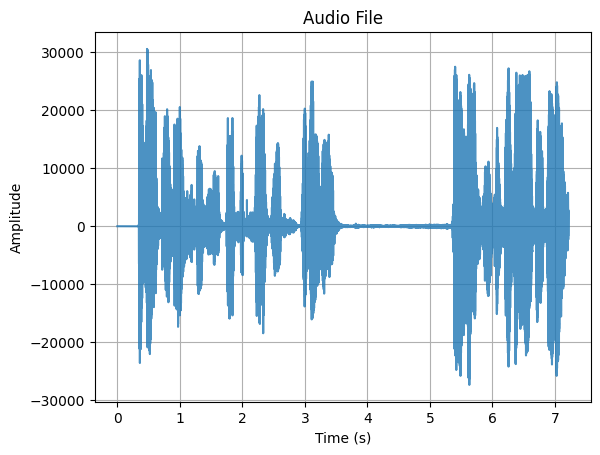

In [ ]:
voice_data, voice_sample_rate, voice_duration = get_audio(my_voice_file_path)
plot_audio_in_time(voice_data, voice_sample_rate, voice_duration)

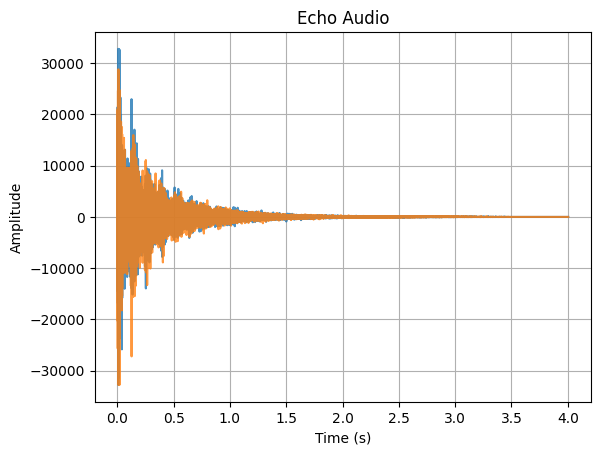

In [ ]:
echo_data, echo_sample_rate, echo_duration = get_audio(long_hall_echo_path)
plot_audio_in_time(echo_data, echo_sample_rate, echo_duration, 'Echo Audio')

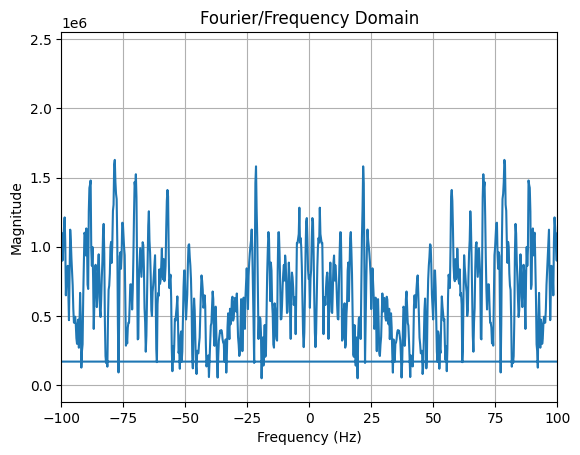

In [ ]:
normalized_echo = normalize_samples(echo_data[:,1])
yf_echo, xf_echo = get_fft_transform(normalized_echo, echo_sample_rate, echo_duration)
plot_audio_in_frequency(xf_echo, yf_echo[:-1],[-100,100])

In [ ]:
voice_echoed = fftconvolve(voice_data,echo_data[:,0])
plot_audio_in_time(voice_echoed,)

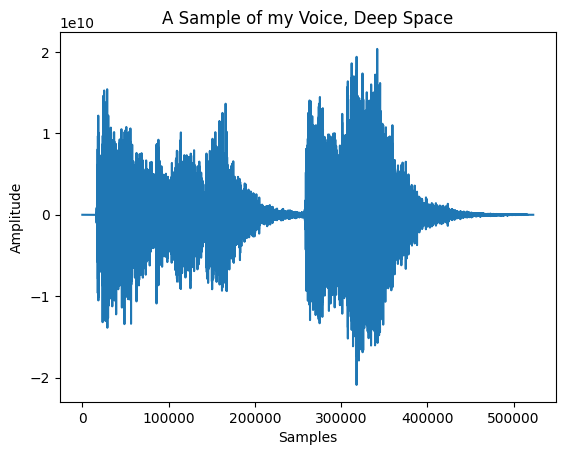

In [ ]:
plt.title("A Sample of my Voice, Deep Space")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(voice_deep_space)

# Writing Result
[Creating a `.wav` file](https://stackoverflow.com/questions/10357992/how-to-generate-audio-from-a-numpy-array)

In [ ]:
results_path = this_file_path.parents[1] / 'audio-files' / 'results'
if not results_path.exists():
    results_path.mkdir()

result_file_path = results_path / 'mateus_e_sam_ecoado.wav'

In [ ]:
example_file_path = results_path / f'sine_{frequency_example}_hz.wav'
scaled_example = np.int16( x / np.max(np.abs(x)) * 32767)
wavfile.write(str(example_file_path),sample_rate_for_example,scaled_example)

In [ ]:
rate = 44100
scaled = np.int16(voice_deep_space / np.max(np.abs(voice_deep_space)) * 32767)
wavfile.write(str(result_file_path), rate, scaled)